## Data Preprocessing and Feature Engineering in Machine Learning

Objective:  
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.  
    
Dataset:  
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:


###1. Data Exploration and Preprocessing:
* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:
  * Standard Scaling
  * Min-Max Scaling
* Discuss the scenarios where each scaling technique is preferred and why.


In [1]:
#loading the dataset into the pandas dataframe
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS assigment/EDA 2/adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.head() #Displays the first 5 rows of the DataFrame.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.tail() #Displays the last 5 rows of the DataFrame.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.shape #Returns the dimensions (rows, columns) of the DataFrame.

(32561, 15)

In [5]:
df.columns # Returns the names of the columns in the DataFrame.

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info() # Provides information about the DataFrame, including data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.dtypes #Returns the data types of each column

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [8]:
df.describe() # Provides descriptive statistics for numerical columns.

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.nunique() # Returns the number of unique values in each column.

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [10]:
df.isnull().sum() # Calculates the number of missing values in each column.

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


There are no null values but its always better to handle the missing values

In [11]:
# Iterate through columns with numerical data types
for i in df.select_dtypes(include=['number']).columns:
    # Fill missing values (NaN) in the current column with the median value of that column
    df[i] = df[i].fillna(df[i].median())

In [12]:
# Iterate through columns with 'object' data type (typically strings or categorical data)
for i in df.select_dtypes(include=['object']).columns:
  # Fill missing values in the current column with the most frequent value (mode)
  df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
# Select numerical columns and exclude the 'age' column
num_col = df.select_dtypes(include=['number']).columns.drop('age')

In [15]:
# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Apply standard scaling to the numerical columns in the DataFrame (excluding 'age')
df[num_col] = scaler.fit_transform(df[num_col])

# Display the DataFrame after scaling
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,50,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,38,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,53,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,28,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,40,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,58,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,22,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


We used StandardScaler to scale the numerical features in our DataFrame (df), excluding the 'age' column.
This means that after the scaling, the numerical features in DataFrame will have a mean of 0 and a standard deviation of 1, making them more suitable for use in many machine learning models.

In [16]:
# Import the MinMaxScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
minmax_scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns in the DataFrame (excluding 'age')
df[num_col] = minmax_scaler.fit_transform(df[num_col])

# Display the DataFrame after scaling
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,50,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,38,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,53,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,28,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,40,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,58,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,22,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


We applied MinMaxScaler to the same numerical columns (num_col) as you did with StandardScaler.
This means that the values in those columns are now rescaled to a range between 0 and 1.

StandardScaler:

Preferred Scenarios:

* Algorithms sensitive to feature scales: Algorithms like Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and K-Means Clustering rely on distance calculations. StandardScaler is preferred in these cases because it ensures that features with larger ranges don't disproportionately influence the distance calculations.
* Data with outliers: If your data has outliers, StandardScaler is generally a better choice than MinMaxScaler. This is because StandardScaler is less affected by outliers since it scales the data based on the standard deviation, which is less sensitive to extreme values.
* Data with a Gaussian (normal) distribution: StandardScaler works well when the data follows a Gaussian distribution, as it transforms the data to have zero mean and unit variance, which aligns with the properties of a normal distribution.
* Preserving the shape of the original distribution: When you want to preserve the shape of the original data distribution, but with a centered mean and unit standard deviation, StandardScaler can be preferred.

MinMaxScaler:

Preferred Scenarios:

* Algorithms requiring input in a specific range: Some algorithms, like neural networks and image processing techniques, often expect input features to be within a specific range (e.g., 0 to 1). MinMaxScaler is ideal for these situations.
* Data without significant outliers: If your data is relatively free of outliers, MinMaxScaler can be a good option because it preserves the original data distribution more closely than StandardScaler.
* Preserving zero values: If it is important to preserve the original zero values and scale them between [0-1], MinMaxScaler is a better option.

In [17]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [18]:
# Select columns with 'object' data type (categorical columns)
categorical_col = df.select_dtypes(include=['object']).columns

# Display the selected categorical columns
categorical_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

### 2. Encoding Techniques:
* Apply One-Hot Encoding to categorical variables with less than 5 categories.
* Use Label Encoding for categorical variables with more than 5 categories.
* Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [19]:
from sklearn.preprocessing import OneHotEncoder # Though OneHotEncoder is imported, it is not used in this code snippet.
for i in categorical_col: # Iterate through each categorical column
  if df[i].nunique() <= 5: # Check if the number of unique values in the column is less than or equal to 5
    print(i) # If true, print the column name
    df = pd.get_dummies(df, columns=[i]) # Apply one-hot encoding to the column using pandas' get_dummies
df.columns # Display the columns of the DataFrame after one-hot encoding

race
sex
income


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')

This code snippet performs one-hot encoding on categorical columns with 5 or fewer unique values using pandas' get_dummies function. It transforms categorical data into a numerical format suitable for machine learning algorithms.

In ourcase only [race, sex, income] have less than 5 unique values

In [20]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,0.021740,0.0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,0.0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,0.000000,0.0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,0.000000,0.0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,0.000000,0.0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0


In [21]:
# # Convert all boolean columns to integer (0/1)
# df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})
for i in df.select_dtypes(include=['bool']).columns:
  df[i]=df[i].astype(int)


In [22]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,0.021740,0.0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,0.0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,0.000000,0.0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,0.000000,0.0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,0.000000,0.0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,0.000000,0.0,...,United-States,0,0,0,0,1,0,1,1,0


In [23]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class for encoding categorical features
lb = LabelEncoder() # Create an instance of the LabelEncoder class
for i in df.select_dtypes(include=['object']).columns: # Iterate through columns with 'object' data type (categorical columns)
  if df[i].nunique() > 5: # Check if the number of unique values in the column is greater than 5
    print(i) # If true, print the column name
    df[i] = lb.fit_transform(df[i]) # Apply Label Encoding to the column using the LabelEncoder instance
df.columns # Display the columns of the DataFrame after Label Encoding

# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
# for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
#     df[col] = lb.fit_transform(df[col])


workclass
education
marital_status
occupation
relationship
native_country


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')

This code snippet performs Label Encoding on categorical columns with more than 5 unique values using the LabelEncoder class. This is a way to convert categorical data into a numerical representation that can be used by machine learning algorithms.  

In our case we have [workclass, education,marital_status, occupation, relationship native_country] columns have more than 5 unique values

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')

In [25]:
df.dtypes

,0
age,int64
workclass,int64
fnlwgt,float64
education,int64
education_num,float64
marital_status,int64
occupation,int64
relationship,int64
capital_gain,float64
capital_loss,float64


In [26]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,0.044302,9,0.800000,4,1,1,0.021740,0.0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,0.048238,9,0.800000,2,4,0,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,0.138113,11,0.533333,0,6,1,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,0.151068,1,0.400000,2,6,0,0.000000,0.0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,0.221488,9,0.800000,2,10,5,0.000000,0.0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,0.166404,7,0.733333,2,13,5,0.000000,0.0,...,39,0,0,0,0,1,1,0,1,0
32557,40,4,0.096500,11,0.533333,2,7,0,0.000000,0.0,...,39,0,0,0,0,1,0,1,0,1
32558,58,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,...,39,0,0,0,0,1,1,0,1,0
32559,22,4,0.128499,11,0.533333,4,1,3,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0


In [27]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,0.044302,9,0.800000,4,1,1,0.021740,0.0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,0.048238,9,0.800000,2,4,0,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,0.138113,11,0.533333,0,6,1,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,0.151068,1,0.400000,2,6,0,0.000000,0.0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,0.221488,9,0.800000,2,10,5,0.000000,0.0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,0.166404,7,0.733333,2,13,5,0.000000,0.0,...,39,0,0,0,0,1,1,0,1,0
32557,40,4,0.096500,11,0.533333,2,7,0,0.000000,0.0,...,39,0,0,0,0,1,0,1,0,1
32558,58,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,...,39,0,0,0,0,1,1,0,1,0
32559,22,4,0.128499,11,0.533333,4,1,3,0.000000,0.0,...,39,0,0,0,0,1,0,1,1,0


Encoding:

One-Hot Encoding

Pros:

* No Ordinal Relationship: One-hot encoding avoids imposing an ordinal relationship on categorical features where there isn't one. For example, encoding 'red', 'green', and 'blue' as 0, 1, and 2 would imply an order, which might not be meaningful. One-hot encoding prevents this.
* Improved Model Performance: One-hot encoding can often lead to better performance in many machine learning models, especially those sensitive to feature scaling and relationships between categories (e.g., linear models, tree-based models).

Cons:

* Increased Dimensionality: One-hot encoding can significantly increase the number of features in the dataset, especially when dealing with categorical features with many unique values. This can lead to increased computational cost and potentially make models more complex.
* Curse of Dimensionality: In some cases, the high dimensionality introduced by one-hot encoding can lead to the curse of dimensionality, where the performance of models can degrade due to the sparsity of data in the high-dimensional space.

Label Encoding

Pros:

* Simplicity: Label encoding is simple to implement and doesn't increase the dimensionality of the dataset.
* Memory Efficiency: Label encoding is generally more memory-efficient compared to one-hot encoding, especially when dealing with categorical features with many unique values.

Cons:

* Ordinal Relationship: Label encoding assigns an ordinal relationship to categorical features, which might be misleading for some algorithms if there isn't a natural order.
* Potential for Misinterpretation: Some models might interpret the numerical values assigned by label encoding as having a meaningful order or distance, leading to incorrect results.


When to Use Which:

* One-Hot Encoding: Generally preferred for categorical features with a small to moderate number of unique values and where there is no inherent order. Suitable for linear models, tree-based models, and neural networks.
* Label Encoding: Often used for categorical features with a large number of unique values to avoid the dimensionality explosion. Suitable for algorithms like tree-based models that are less sensitive to ordinal relationships.

3. Feature Engineering:
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [28]:
# This line engineers a new feature called capital_gain_ratio by calculating the proportion of
# capital gains relative to the total capital gains and losses.
# By adding 1 to the denominator, it avoids potential division by zero
# errors when both gains and losses are zero.
df['capital_gain_ratio'] = df['capital_gain'] / (df['capital_gain'] + df['capital_loss'] + 1)  # Add 1 to avoid division by zero

This new feature shows how much profit someone makes from their investments compared to how much they might lose. This combined information could be more helpful for the model to learn from than looking at gains and losses separately.

In [29]:
# Example 2: Age Grouping
# df['Age_Group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle_Aged', 'Senior', 'Elderly'])

# Define a function to categorize age into groups
def age_category(age):
    if age <= 25:
        return 'Young'
    elif age <= 45:
        return 'Middle_Aged'
    elif age <= 65:
        return 'Senior'
    else:
        return 'Elderly'

# Apply the function to create the 'Age_Group' feature
df['Age_Group'] = df['age'].apply(age_category)

This feature assumes that people in different age groups might have different income levels, and this grouping helps the model pick up on those trends better than just looking at age as a single number.

In [30]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_gain_ratio,Age_Group
0,39,7,0.044302,9,0.800000,4,1,1,0.021740,0.0,...,0,0,0,1,0,1,1,0,0.021278,Middle_Aged
1,50,6,0.048238,9,0.800000,2,4,0,0.000000,0.0,...,0,0,0,1,0,1,1,0,0.000000,Senior
2,38,4,0.138113,11,0.533333,0,6,1,0.000000,0.0,...,0,0,0,1,0,1,1,0,0.000000,Middle_Aged
3,53,4,0.151068,1,0.400000,2,6,0,0.000000,0.0,...,0,1,0,0,0,1,1,0,0.000000,Senior
4,28,4,0.221488,9,0.800000,2,10,5,0.000000,0.0,...,0,1,0,0,1,0,1,0,0.000000,Middle_Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,0.166404,7,0.733333,2,13,5,0.000000,0.0,...,0,0,0,1,1,0,1,0,0.000000,Middle_Aged
32557,40,4,0.096500,11,0.533333,2,7,0,0.000000,0.0,...,0,0,0,1,0,1,0,1,0.000000,Middle_Aged
32558,58,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,...,0,0,0,1,1,0,1,0,0.000000,Senior
32559,22,4,0.128499,11,0.533333,4,1,3,0.000000,0.0,...,0,0,0,1,0,1,1,0,0.000000,Young


In [31]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
capital_gain,119
capital_loss,92


In [32]:
num_col = df.select_dtypes(include=['number']).columns
num_col # includes all numerical columns in num_col variable

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K', 'capital_gain_ratio'],
      dtype='object')

In [33]:
df[num_col].isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
capital_gain,0
capital_loss,0


In [34]:
from scipy.stats import skew, kurtosis  # Import functions for calculating skewness and kurtosis
for i in num_col:  # Iterate through each numerical column in the 'num_col' list
    print(f"Skewness of {i}: {skew(df[i])}")  # Calculate and print skewness of the column
    print(f"Kurtosis of {i}: {kurtosis(df[i])}\n")  # Calculate and print kurtosis of the column

Skewness of age: 0.5587176292398571
Kurtosis of age: -0.16628621434407442

Skewness of workclass: -0.751989367733974
Kurtosis of workclass: 1.681944358685901

Skewness of fnlwgt: 1.4469134351423278
Kurtosis of fnlwgt: 6.217671807559235

Skewness of education: -0.933999407988287
Kurtosis of education: 0.680366410740489

Skewness of education_num: -0.31166150963546535
Kurtosis of education_num: 0.6231640802269998

Skewness of marital_status: -0.013507515735727596
Kurtosis of marital_status: -0.5361823628068216

Skewness of occupation: 0.11457803781209061
Kurtosis of occupation: -1.2347154037683994

Skewness of relationship: 0.7867815310322387
Kurtosis of relationship: -0.7684246212478487

Skewness of capital_gain: 11.953296998194313
Kurtosis of capital_gain: 154.77548393002536

Skewness of capital_loss: 4.594417456439771
Kurtosis of capital_loss: 20.373488564437302

Skewness of hours_per_week: 0.22763204977477686
Kurtosis of hours_per_week: 2.916054670984491

Skewness of native_country: 

- **Age**: Nearly symmetric distribution (low skewness), slightly platykurtic (flat tails).  
- **Workclass & Education**: Highly left-skewed and leptokurtic (peaked distribution).  
- **Fnlwgt**: Right-skewed and moderately peaked.  
- **Marital Status & Occupation**: Left-skewed, relatively normal kurtosis.  
- **Relationship**: Slight right skew, platykurtic (broad peak).  
- **Capital Gain & Loss**: Extremely right-skewed with high kurtosis (many extreme values).  
- **Hours Per Week**: Slight left skew, near-normal kurtosis.  
- **Native Country & Race**: Highly skewed and peaked, indicating imbalanced categorical distribution.  
- **Sex**: Symmetric skewness, platykurtic.  
- **Income**: Left-skewed for ≤50K, right-skewed for >50K, nearly normal kurtosis.  
- **Capital Gain Ratio**: Highly right-skewed, heavy-tailed.

In [35]:
# importing Libraries for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Figure size 1500x1000 with 0 Axes>

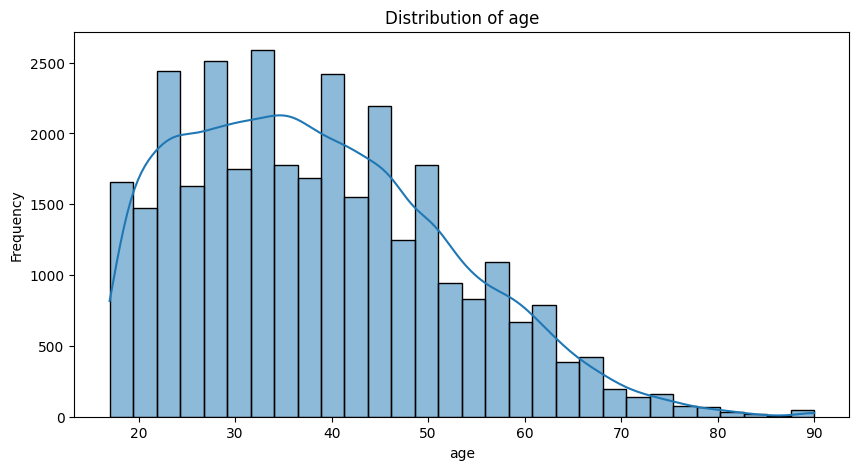

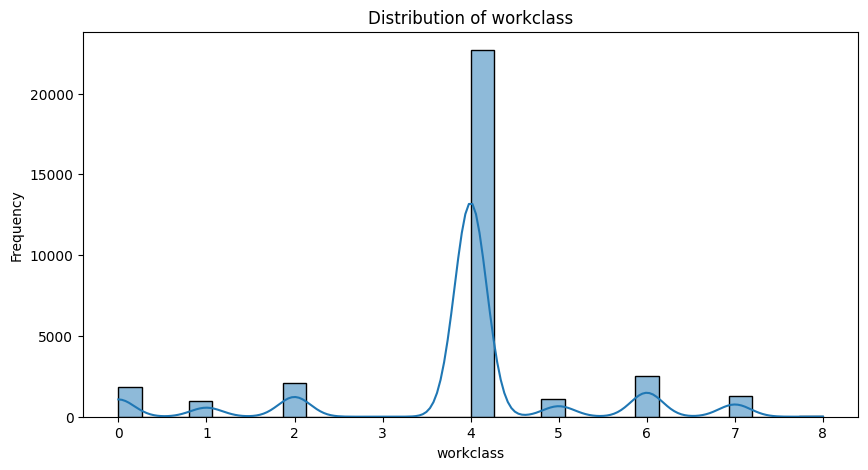

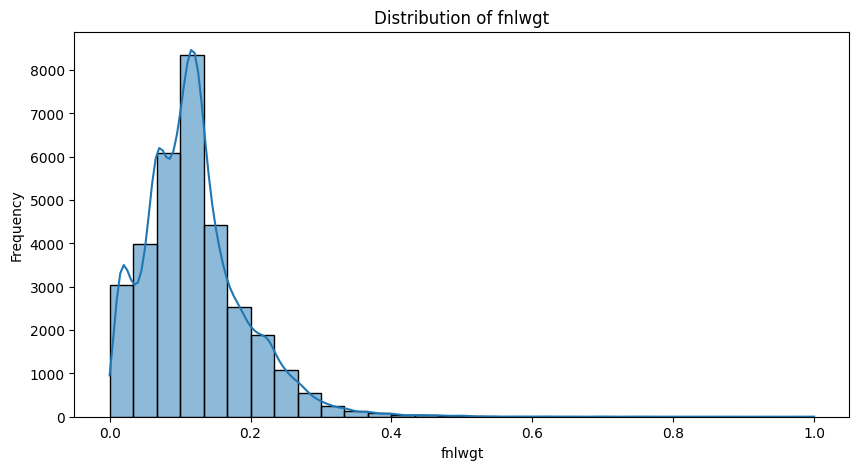

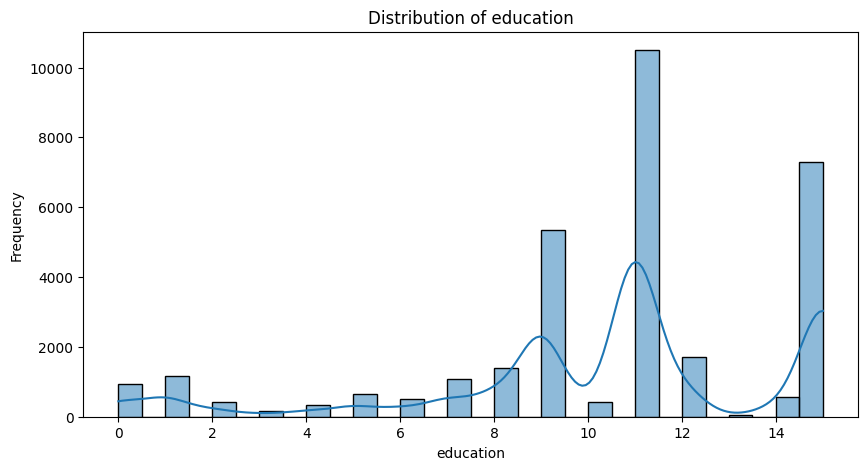

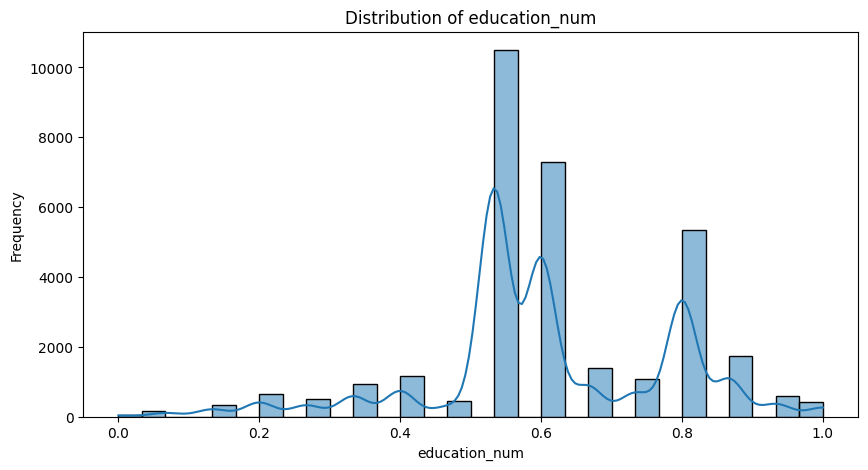

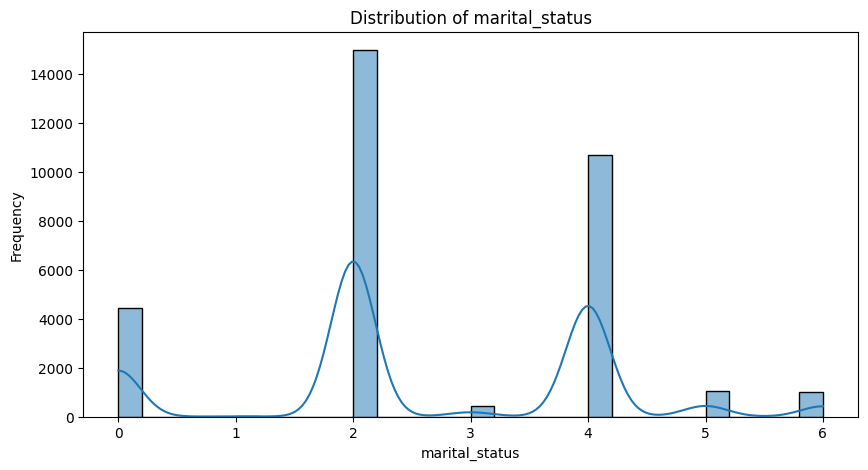

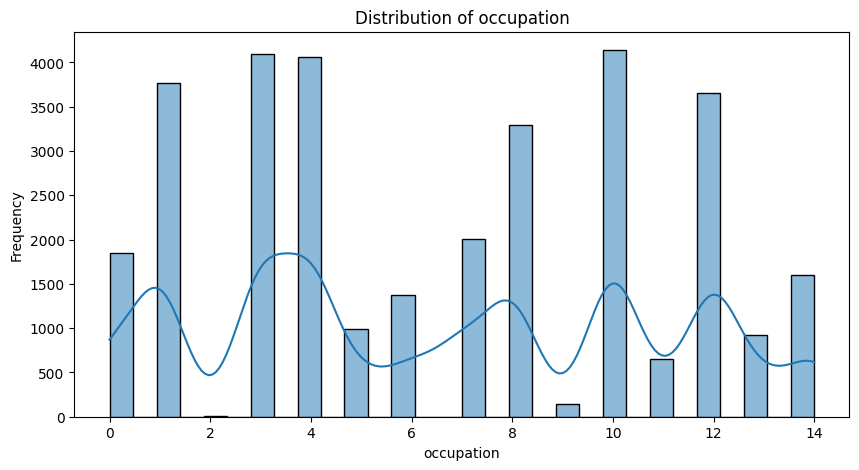

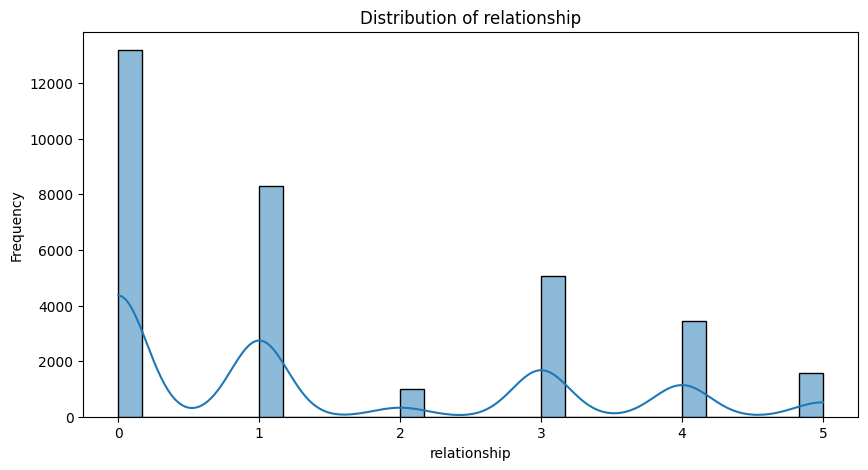

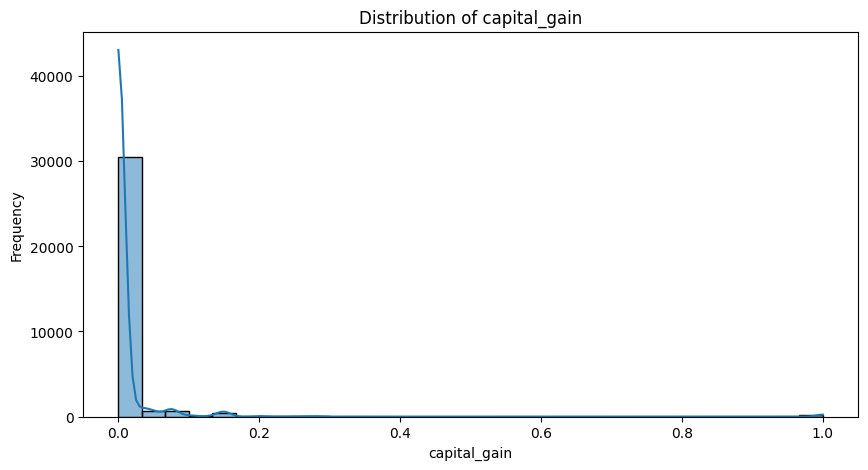

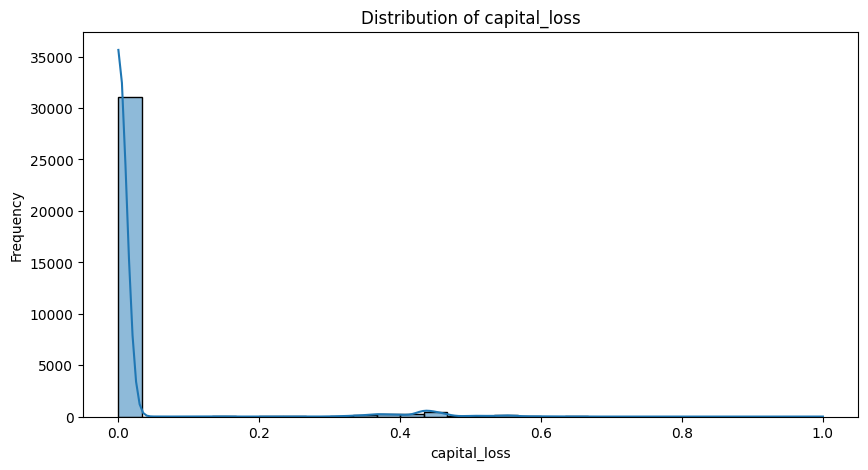

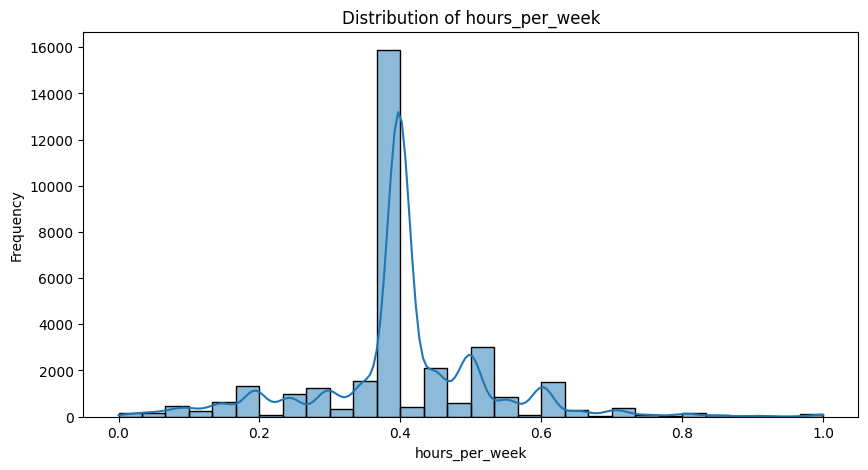

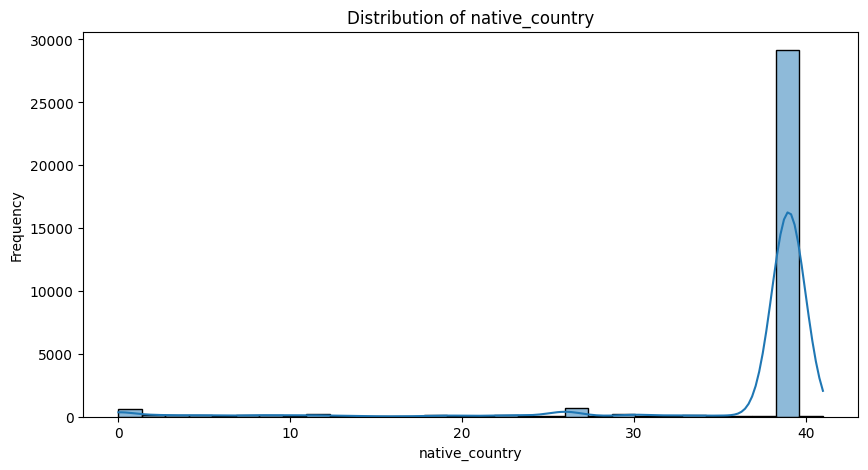

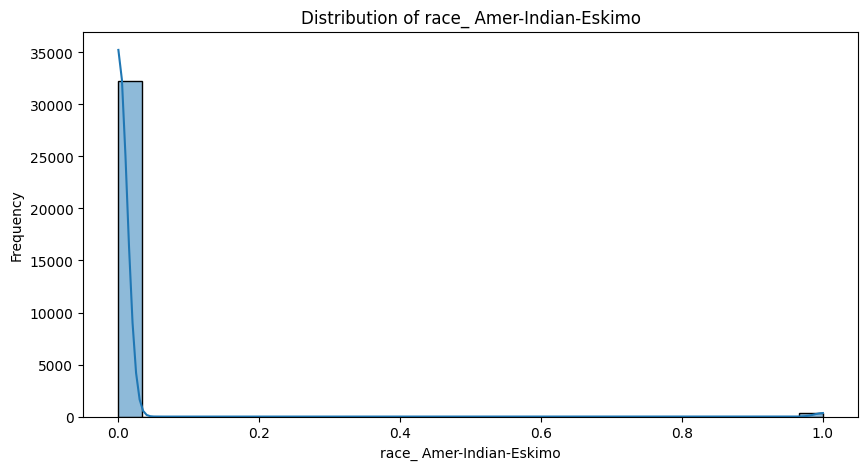

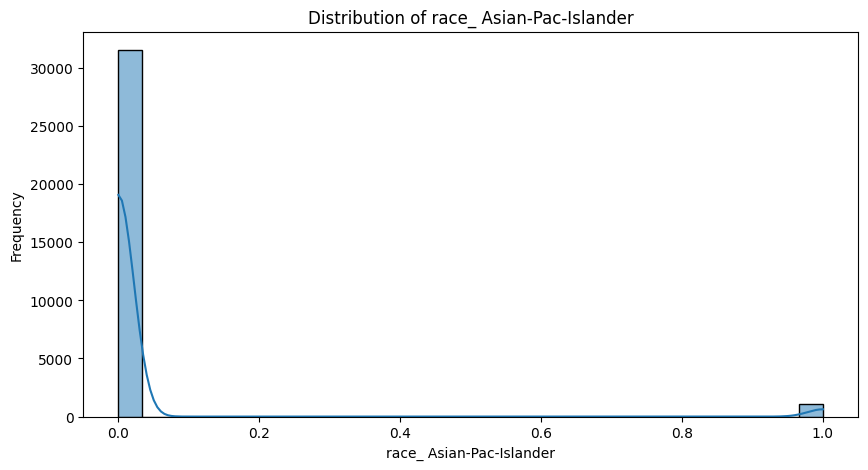

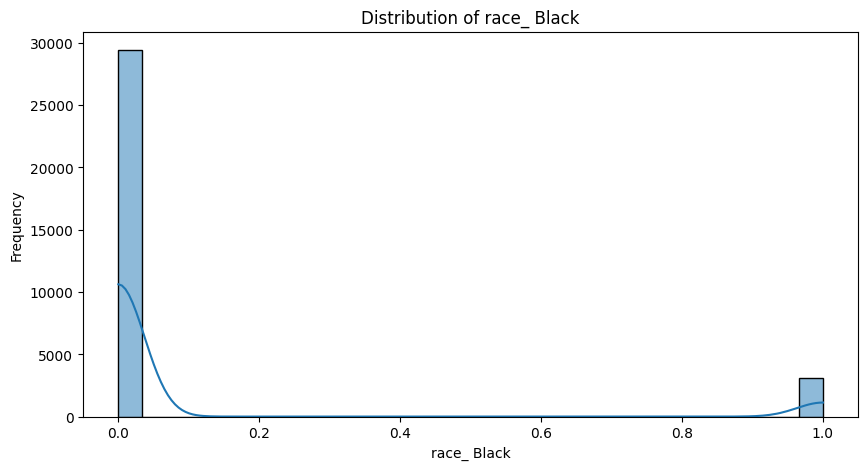

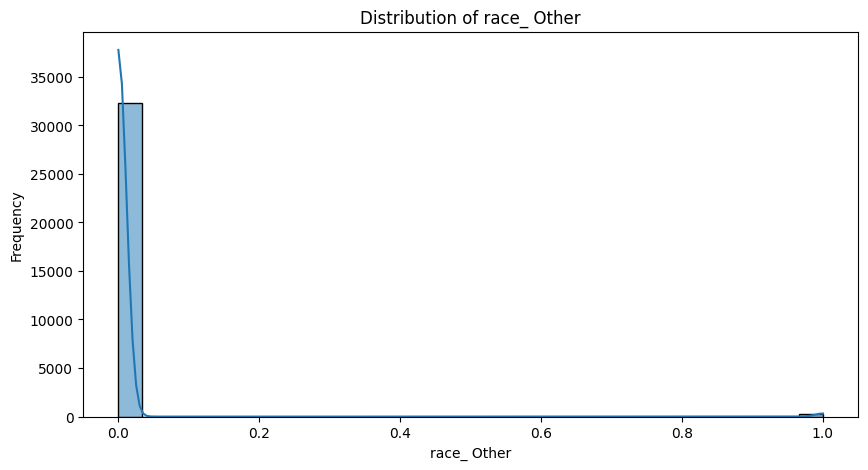

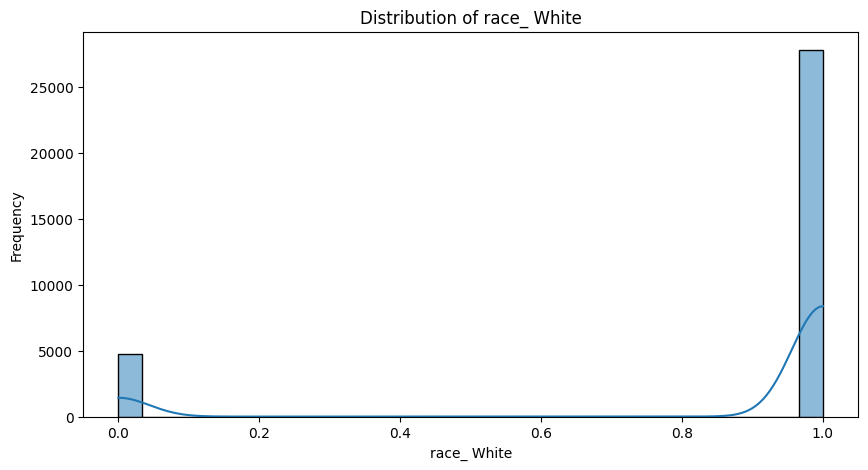

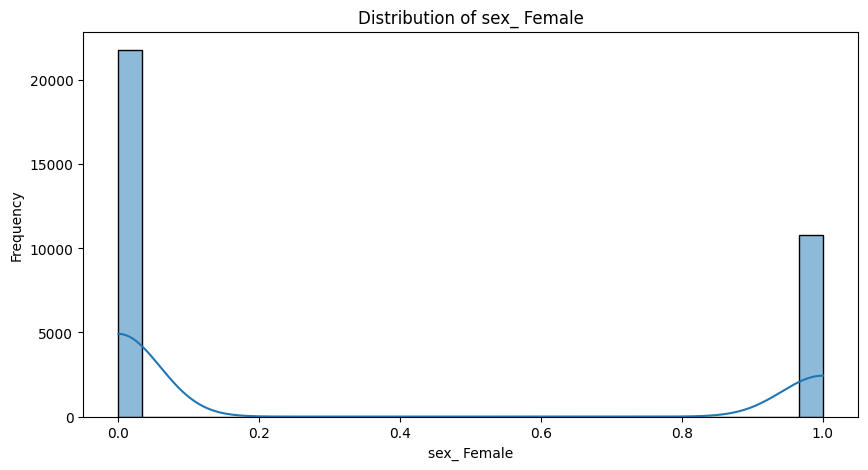

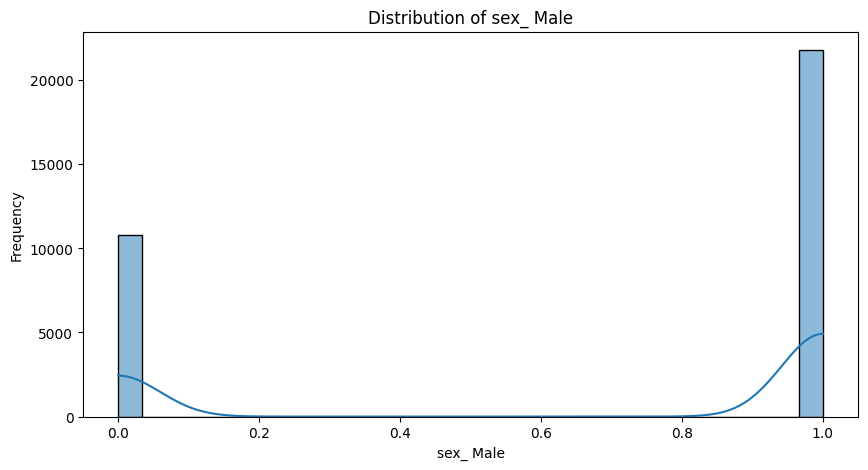

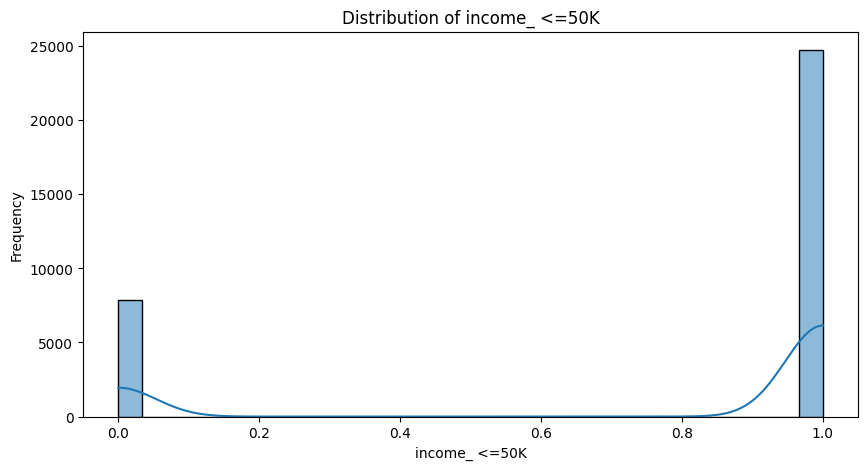

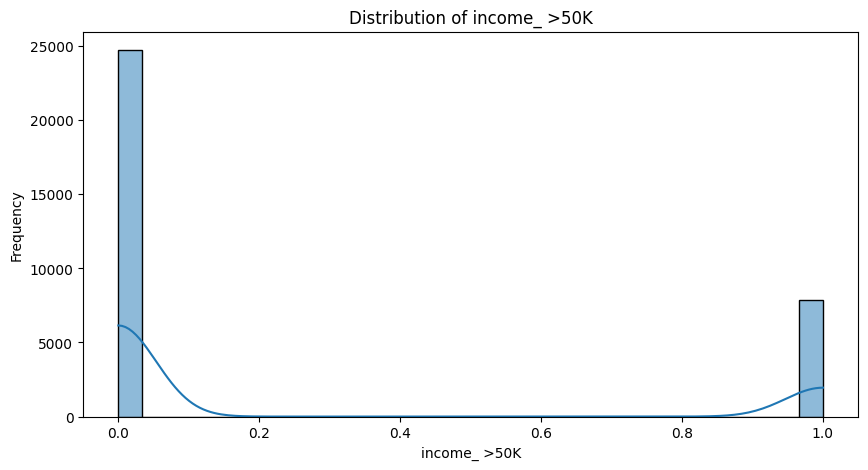

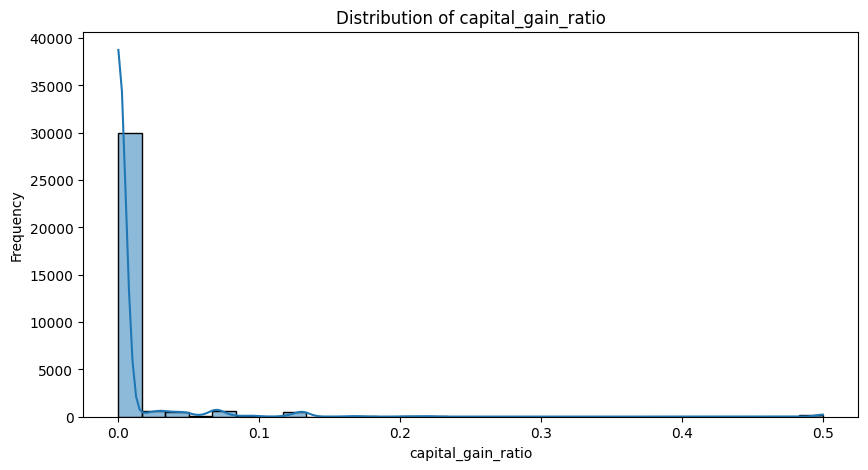

In [36]:
plt.figure(figsize=(15, 10))  # Set figure size once

for i in num_col:
  plt.figure(figsize=(10, 5))  # Create a new figure for each feature
  sns.histplot(df[i], bins=30, kde=True)  # Add KDE for better visualization
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [37]:
for i in num_col:  # Iterate through each numerical column in 'num_col'
  df[i] = np.log1p(df[i])  # Apply log transformation (log1p) to the column

In [38]:
from scipy.stats import skew, kurtosis
for i in num_col:
    print(f"Skewness of {i}: {skew(df[i])}")
    print(f"Kurtosis of {i}: {kurtosis(df[i])}\n")


Skewness of age: -0.11333627144778004
Kurtosis of age: -0.7715114727357064

Skewness of workclass: -2.286203346715246
Kurtosis of workclass: 5.160918440599685

Skewness of fnlwgt: 1.0161648799087604
Kurtosis of fnlwgt: 2.9271379393511685

Skewness of education: -2.4851580901827663
Kurtosis of education: 6.055217835072572

Skewness of education_num: -0.7748142471501368
Kurtosis of education_num: 1.6076328035094871

Skewness of marital_status: -1.1031751823744544
Kurtosis of marital_status: 0.5018960693660142

Skewness of occupation: -0.8625938488063067
Kurtosis of occupation: -0.12439478740005416

Skewness of relationship: 0.28496848488596466
Kurtosis of relationship: -1.4328267804374035

Skewness of capital_gain: 10.670945496165398
Kurtosis of capital_gain: 129.224600990235

Skewness of capital_loss: 4.494749509891739
Kurtosis of capital_loss: 18.872359224185548

Skewness of hours_per_week: -0.37763489851080656
Kurtosis of hours_per_week: 2.3683410732984678

Skewness of native_country:

### **Inference After Log Transformation:**  
- **Reduction in Skewness**: Some features (e.g., `capital_loss`, `native_country`, `race_Asian-Pac-Islander`) show reduced skewness, improving normality.  
- **Kurtosis Impact**: Some features still have high kurtosis (e.g., `capital_gain` increased), meaning extreme values remain.  
- **Minor Changes**: Features like `age`, `fnlwgt`, and `education_num` saw only slight improvements.  
- **Capital Gain Ratio**: Skewness increased post-transformation, indicating the transformation may not be ideal for this feature.  

**Conclusion**: Log transformation helped for some variables but wasn’t effective for highly skewed ones like `capital_gain`. You might need further transformation (e.g., Box-Cox) or outlier treatment.

<Figure size 1500x1000 with 0 Axes>

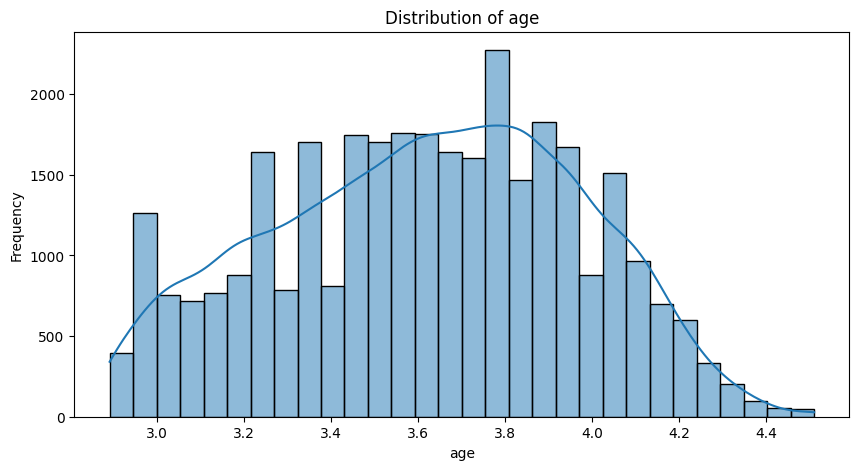

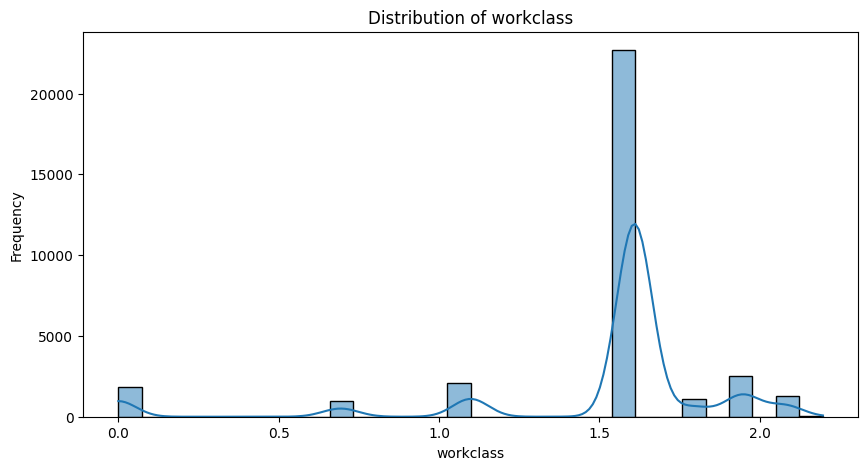

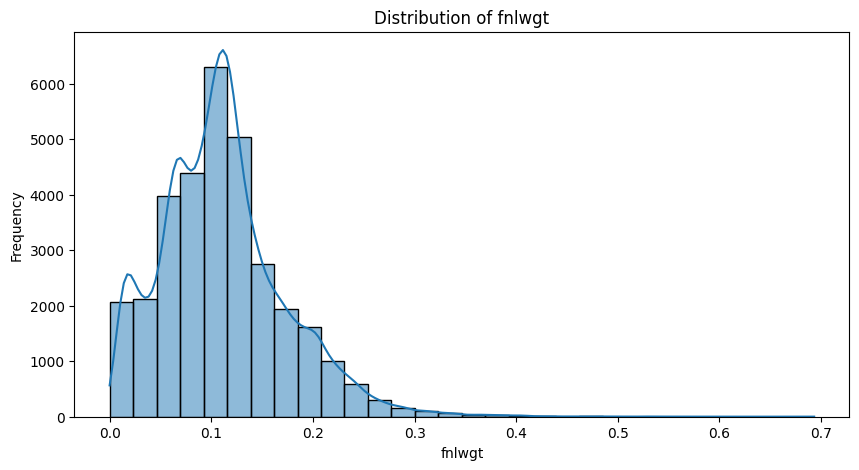

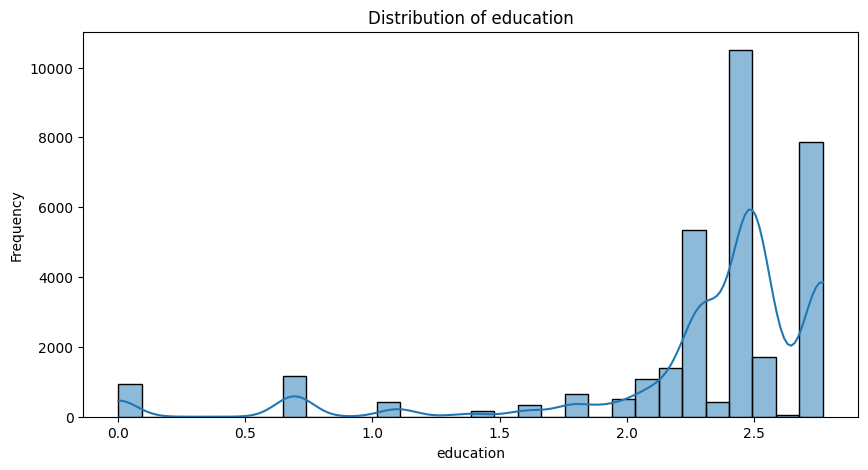

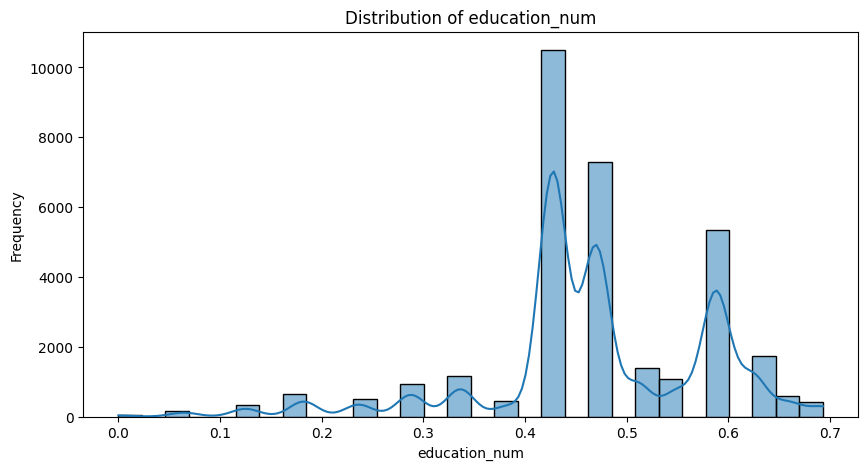

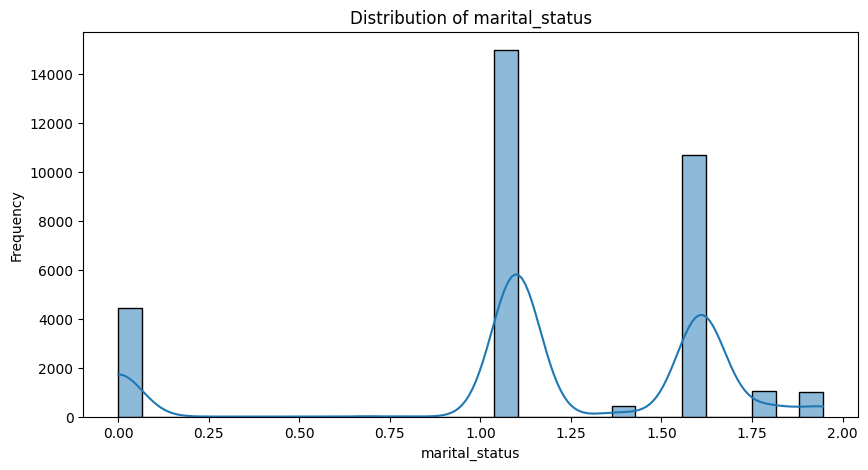

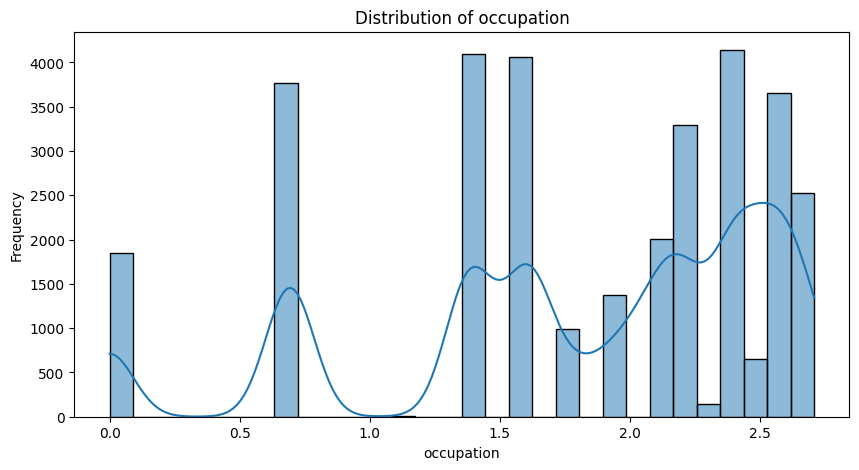

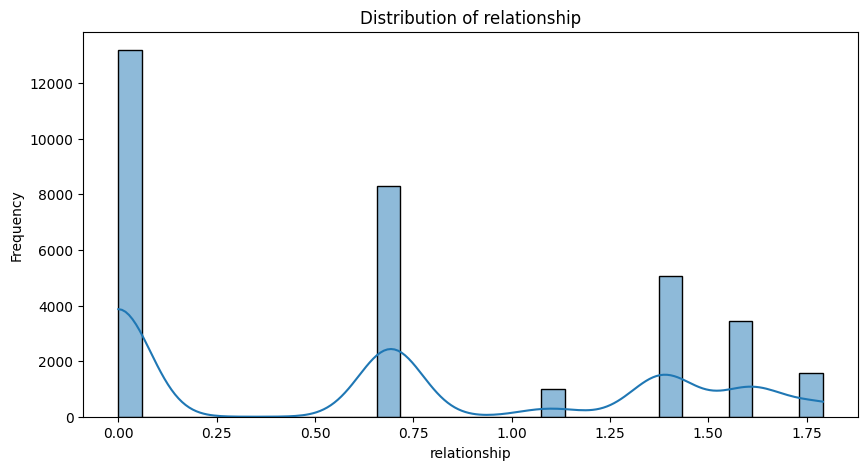

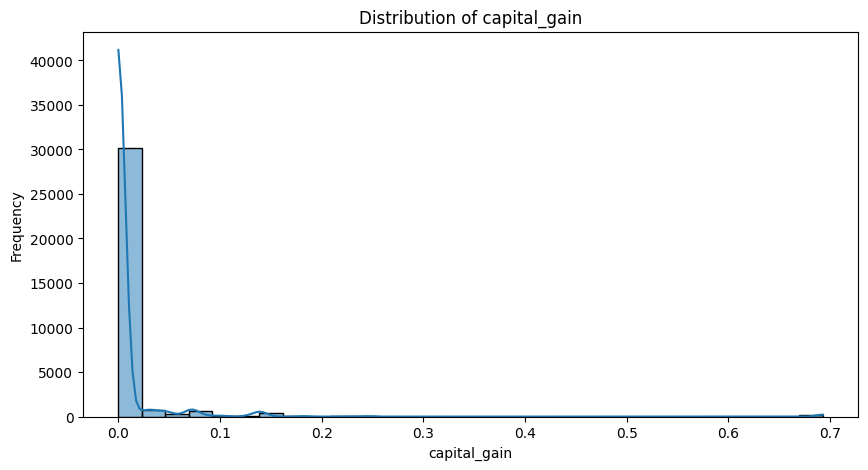

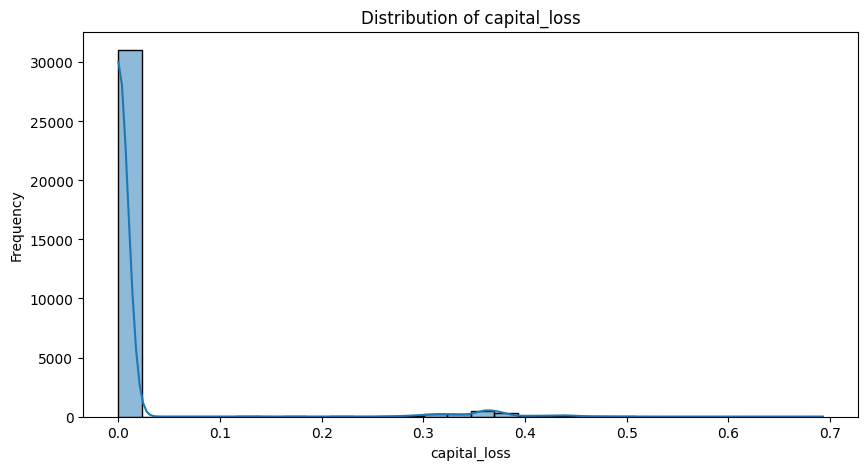

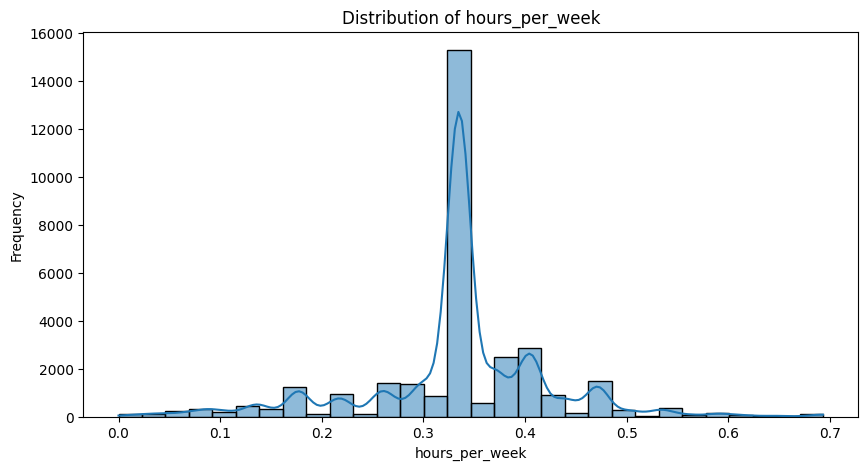

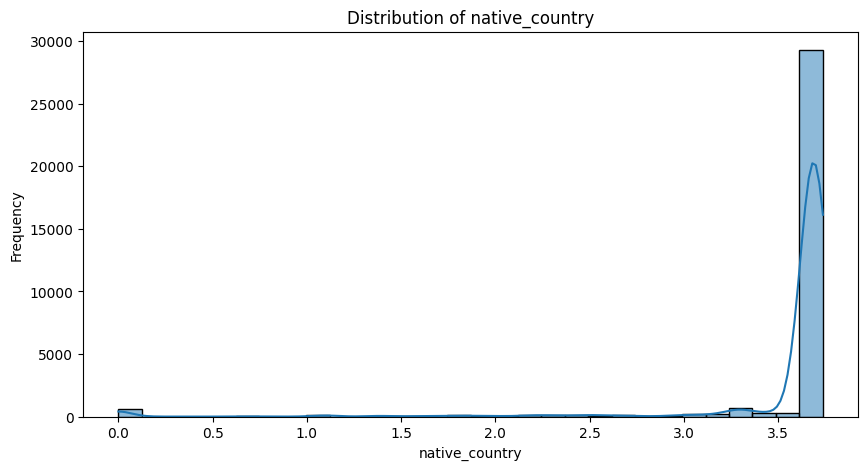

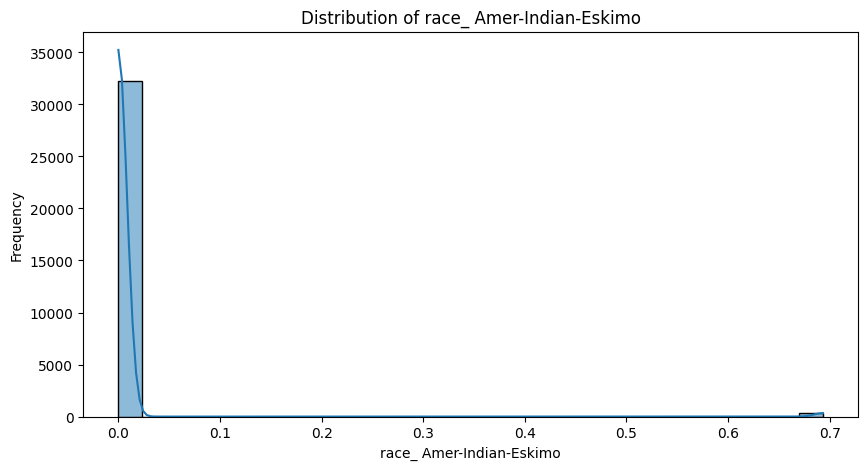

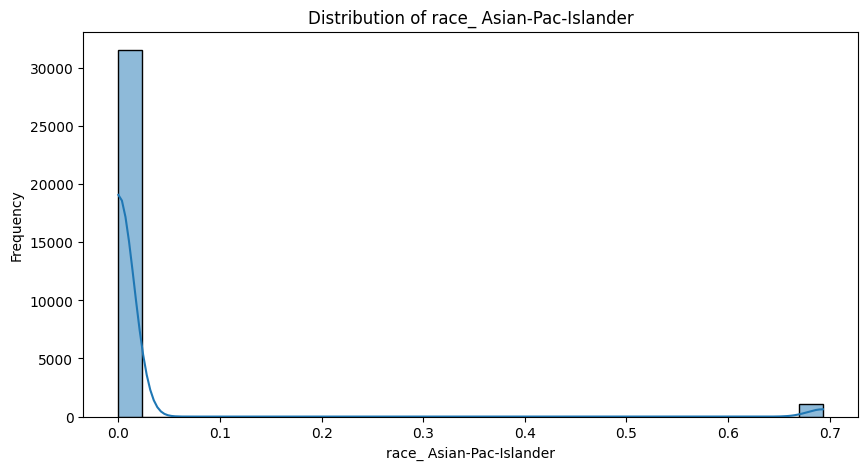

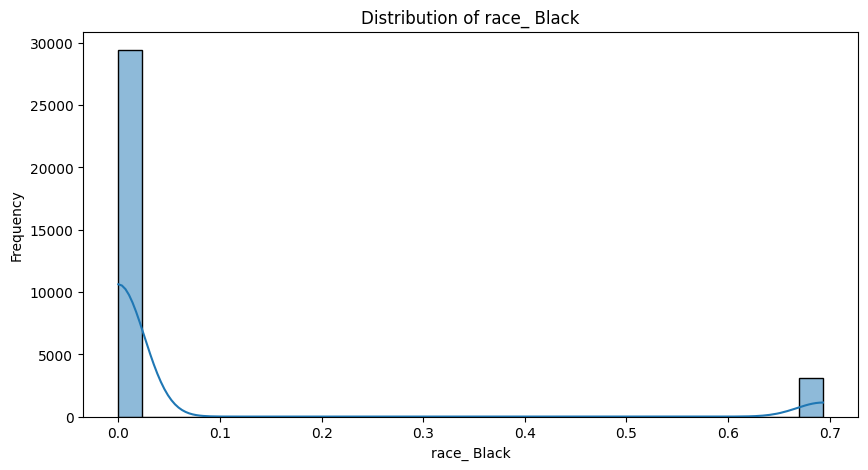

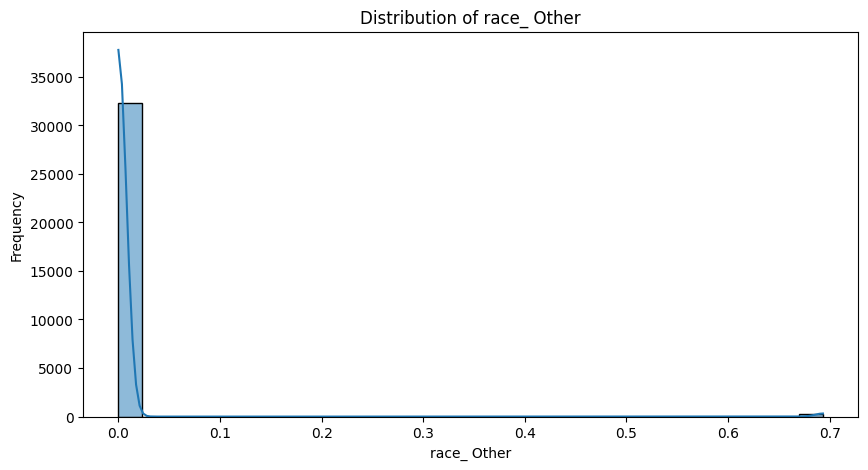

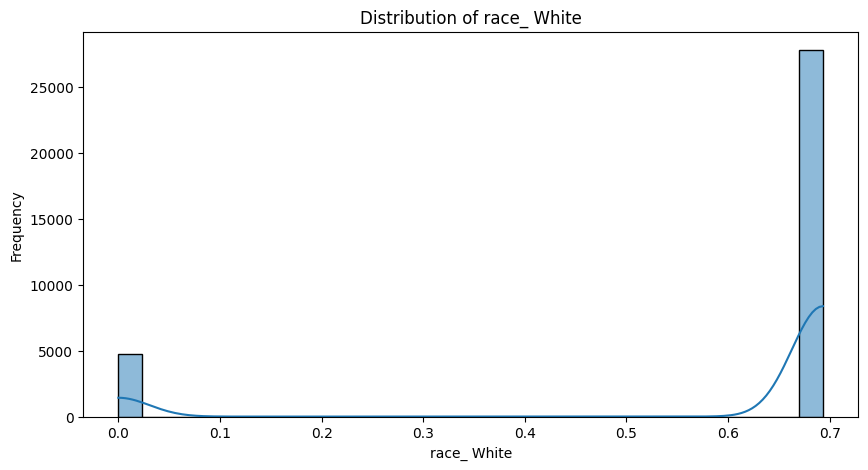

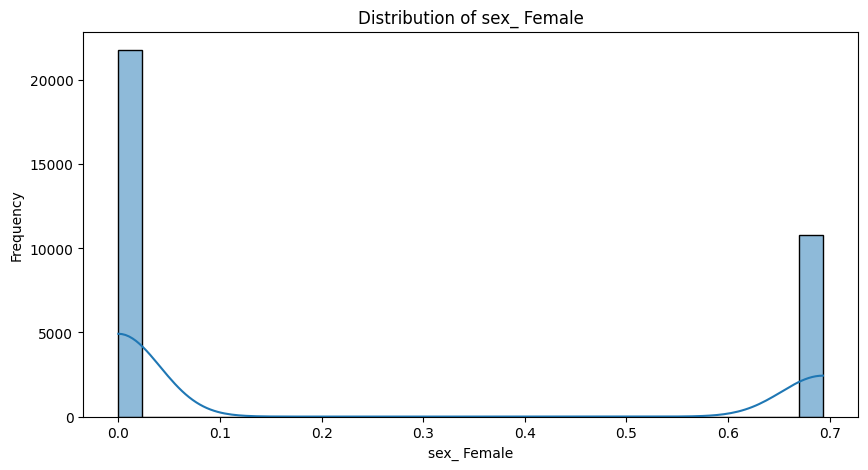

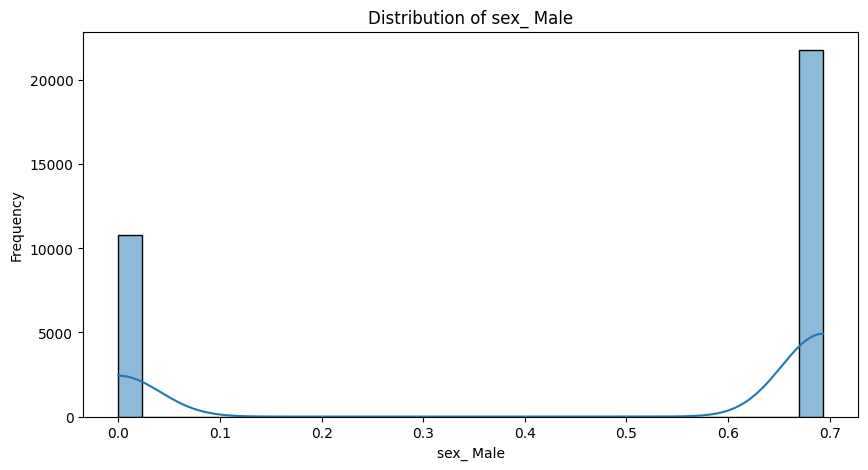

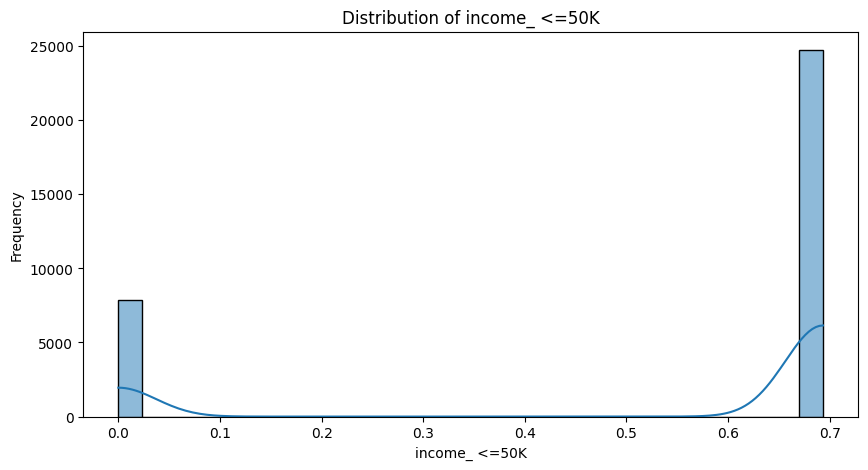

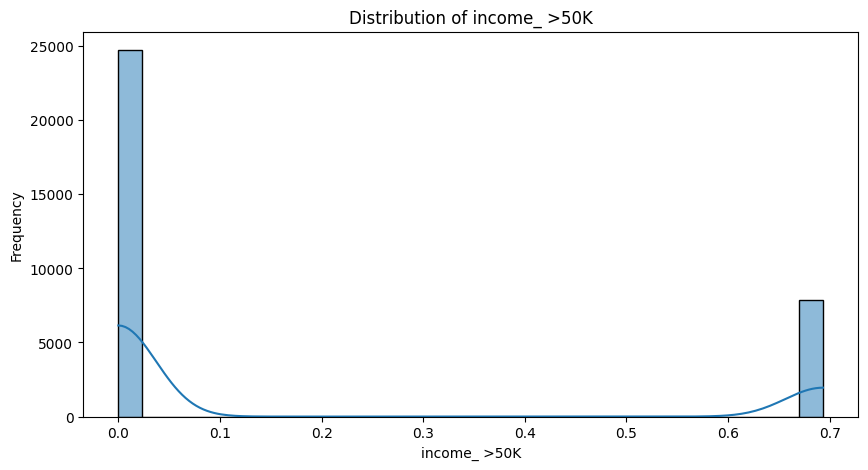

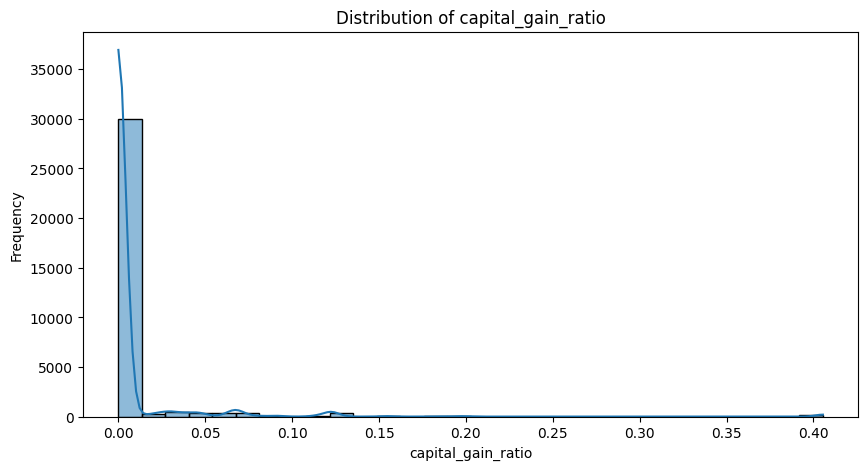

In [39]:
plt.figure(figsize=(15, 10))  # Set figure size once

for i in num_col:
  plt.figure(figsize=(10, 5))  # Create a new figure for each feature
  sns.histplot(df[i], bins=30, kde=True)  # Add KDE for better visualization
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       32561 non-null  float64
 1   workclass                 32561 non-null  float64
 2   fnlwgt                    32561 non-null  float64
 3   education                 32561 non-null  float64
 4   education_num             32561 non-null  float64
 5   marital_status            32561 non-null  float64
 6   occupation                32561 non-null  float64
 7   relationship              32561 non-null  float64
 8   capital_gain              32561 non-null  float64
 9   capital_loss              32561 non-null  float64
 10  hours_per_week            32561 non-null  float64
 11  native_country            32561 non-null  float64
 12  race_ Amer-Indian-Eskimo  32561 non-null  float16
 13  race_ Asian-Pac-Islander  32561 non-null  float16
 14  race_ 

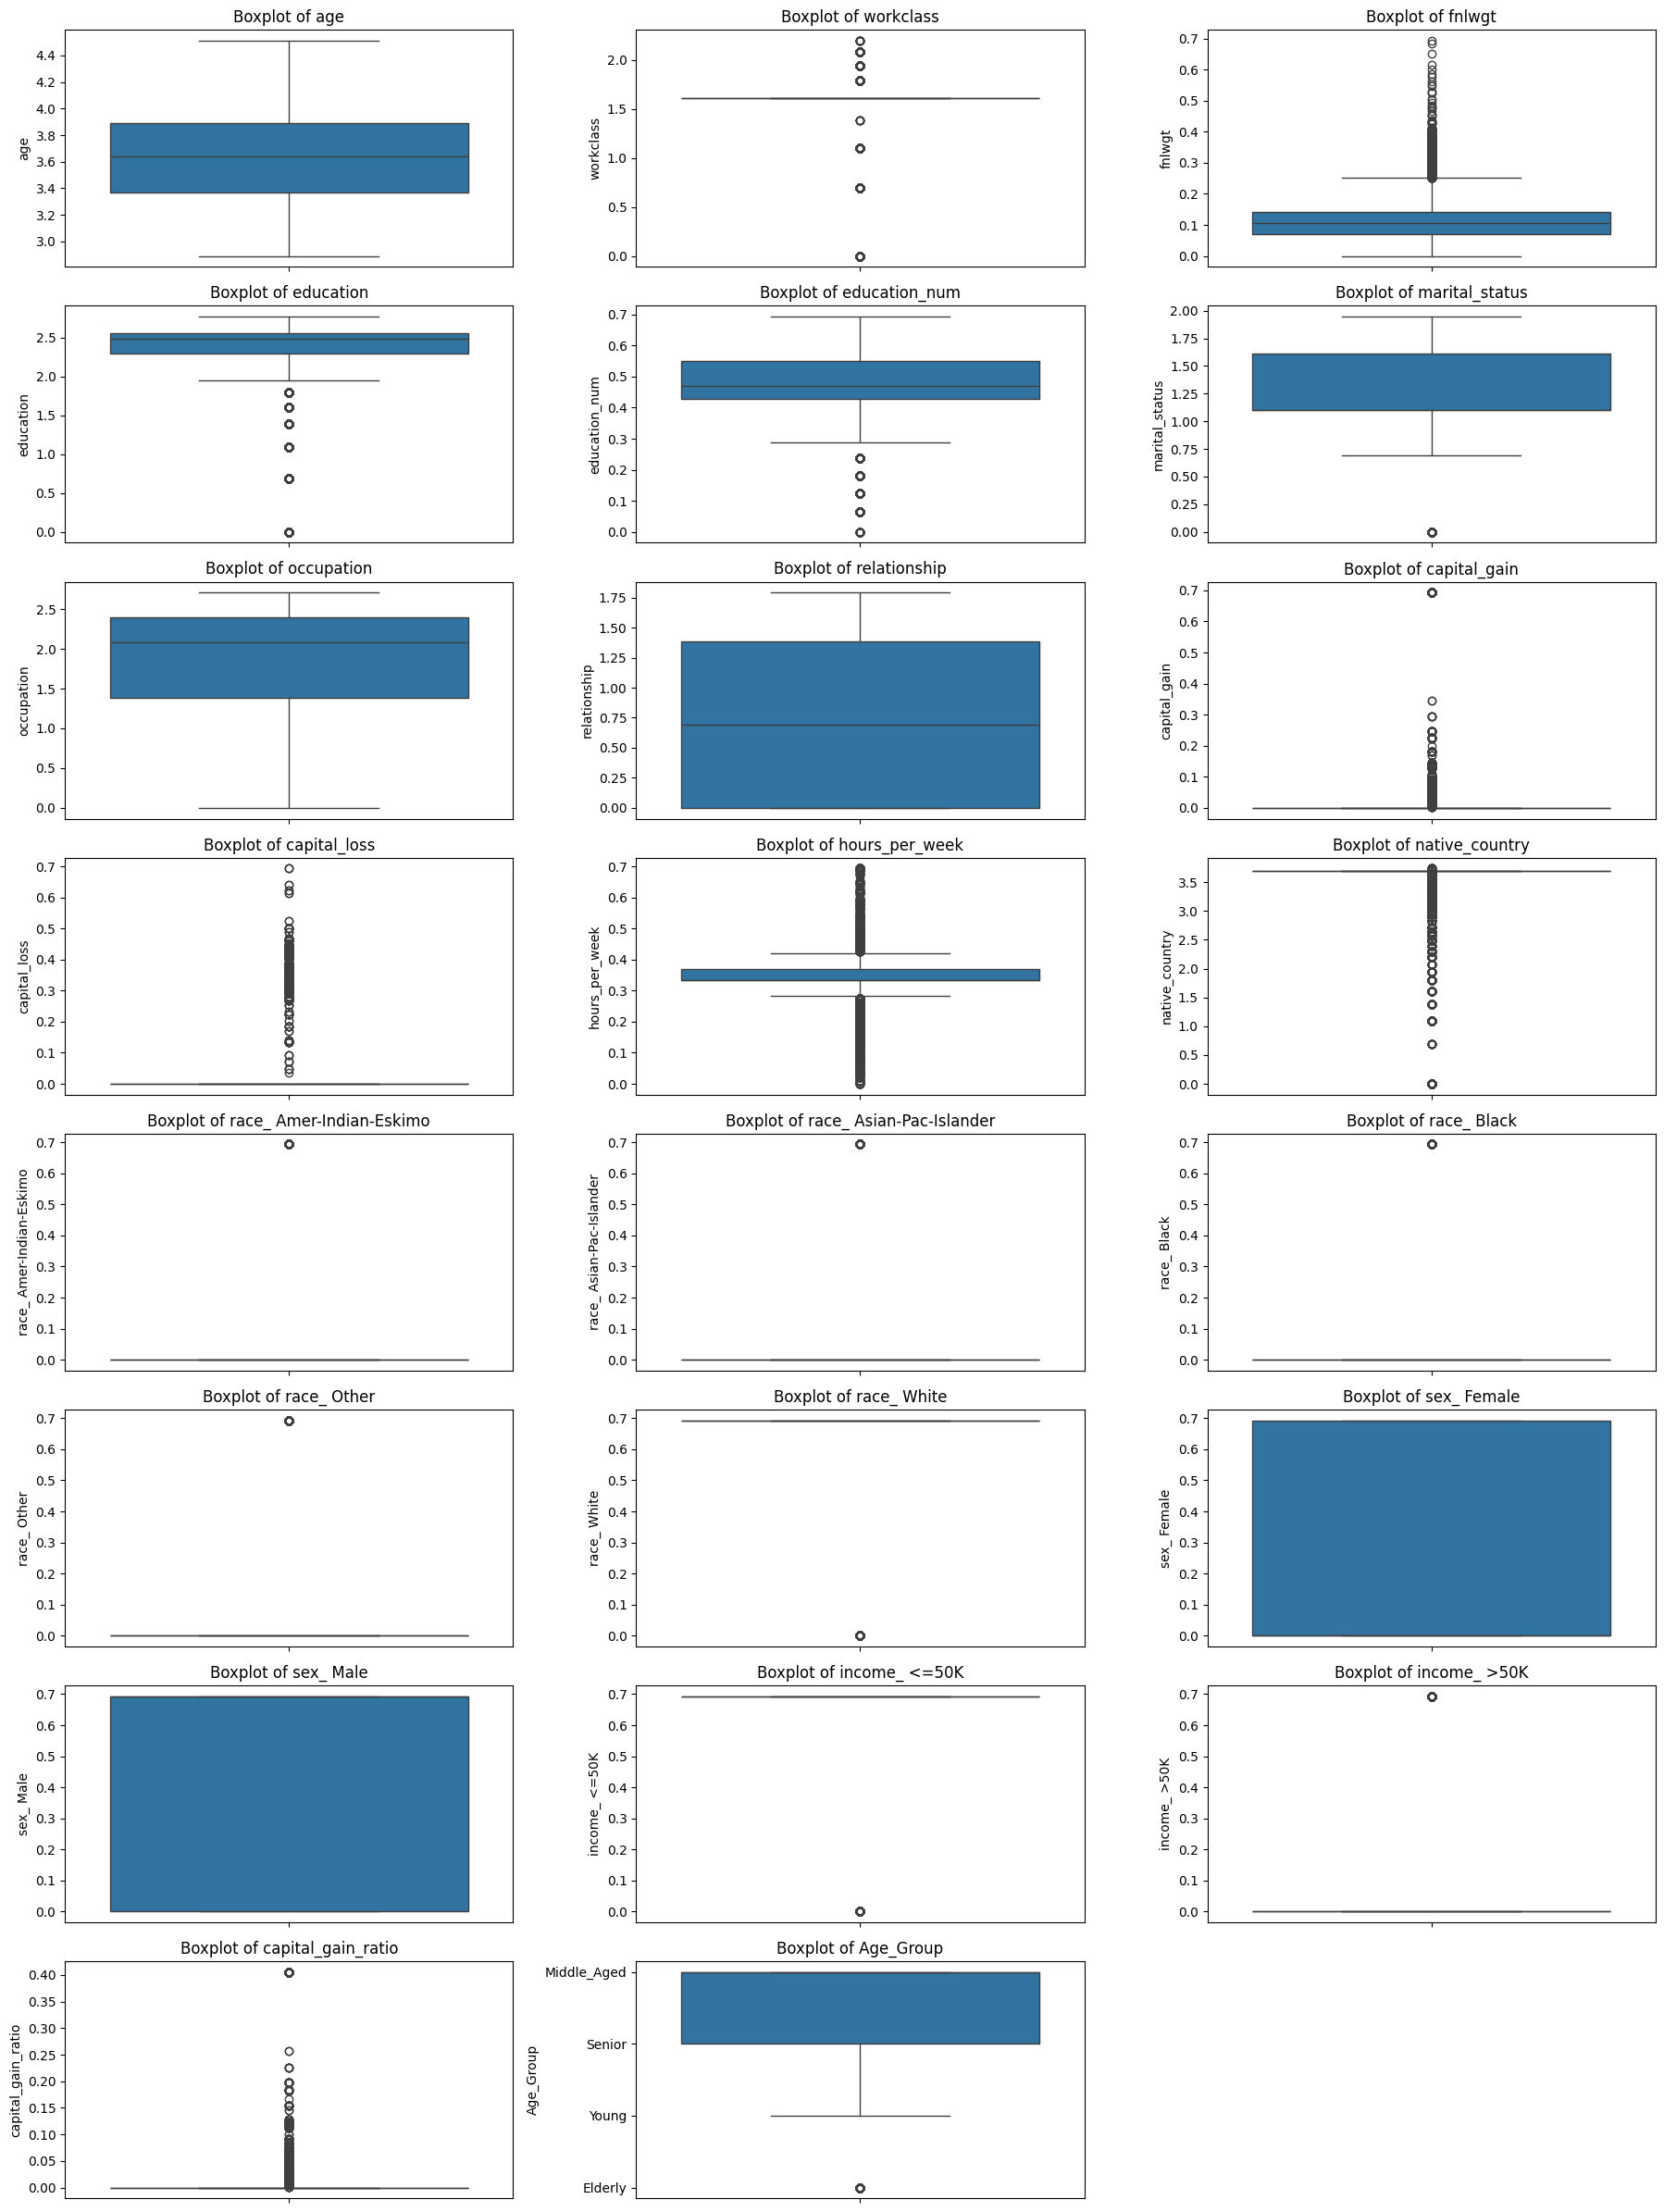

In [41]:
plt.figure(figsize=(18, 24))  # Adjust figure size to fit 24 subplots

for i, j in enumerate(df.columns, 1):  # Iterate through columns with index (i) starting from 1
  plt.subplot(8, 3, i)  # Create subplots in an 8x3 grid, placing the current plot at position i
  sns.boxplot(y=df[j])  # Generate a box plot for the current column (j)
  plt.title(f'Boxplot of {j}')  # Set the title of the subplot to the column name

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the plot

In [42]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K', 'capital_gain_ratio'],
      dtype='object')

In [43]:
df.shape # checking the shape of the before removing outliers

(32561, 23)

### 4. Feature Selection:
* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
* Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [44]:
from sklearn.ensemble import IsolationForest # Import the IsolationForest class for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42) # Create an IsolationForest instance with specified parameters
df['outlier'] = iso_forest.fit_predict(df[num_cols]) # Fit the model and predict outliers, adding a new 'outlier' column
df = df[df['outlier'] == 1].drop(columns=['outlier']) # Remove outliers and the 'outlier' column from the DataFrame
print("Outliers removed. New dataset shape:", df.shape) # Print a message indicating outlier removal and the new dataset shape

Outliers removed. New dataset shape: (30933, 23)


The change in shape is due to the removal of outlier data points. The Isolation Forest algorithm identifies data points that are significantly different from the majority of the data and marks them as outliers. These outliers are then removed from the DataFrame to improve the quality of the data for modeling.

In [45]:
!pip install ppscore # Install the ppscore library for calculating Predictive Power Score (PPS)

In [46]:
import ppscore as pps # Import the ppscore library for calculating Predictive Power Score (PPS)
import seaborn as sns # Import seaborn for data visualization
import matplotlib.pyplot as plt # Import matplotlib for creating plots

# Compute PPS for each feature pair
pps_matrix = pps.matrix(df).pivot(index='y', columns='x', values='ppscore')
# Calculate the PPS matrix using pps.matrix and pivot it for better readability
pps_matrix # Display the PPS matrix

x,Age_Group,age,capital_gain,capital_gain_ratio,capital_loss,education,education_num,fnlwgt,hours_per_week,income_ <=50K,...,occupation,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,relationship,sex_ Female,sex_ Male,workclass
y,,,,,,,,,,,,,,,,,,,,,
Age_Group,1.000000,1.000000,0.000000,0.000000,0.005449,0.061717,0.061717,0.123311,0.145974,0.000000,...,0.040023,0.0,0.0,0.000000,0.0,0.00000,0.187407,0.000000,0.000000,0.035950
age,0.616273,1.000000,0.000048,0.000048,0.004531,0.028139,0.028139,0.000000,0.022584,0.046454,...,0.023876,0.0,0.0,0.000000,0.0,0.00000,0.189462,0.006520,0.006520,0.029523
capital_gain,0.000000,0.000000,1.000000,0.994880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
capital_gain_ratio,0.000000,0.000000,0.995979,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
capital_loss,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
education,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
education_num,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.029286,...,0.146997,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
fnlwgt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
hours_per_week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


When I analyze my PPS matrix, I notice some strong predictive relationships:  

1. **Redundant Features**  
   - `capital_gain` and `capital_gain_ratio` have a PPS of **~0.995**, meaning they provide almost the same information. I might consider keeping only one.  
   - `education` and `education_num` have a PPS of **1.000**, which tells me one can fully predict the other. Keeping both might be unnecessary.  
   - `Age_Group` and `age` also have a PPS of **1.000**, confirming that they are just different representations of the same variable.  

2. **Predictive Power for My Target (`income_ >50K`)**  
   - Most features have low PPS scores with my target, meaning they don’t strongly predict `income_ >50K` on their own.  
   - However, `education_num`, `workclass`, and `occupation` have slightly higher scores, suggesting they might be more useful predictors.  

<ipython-input-47-792abd0f274a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


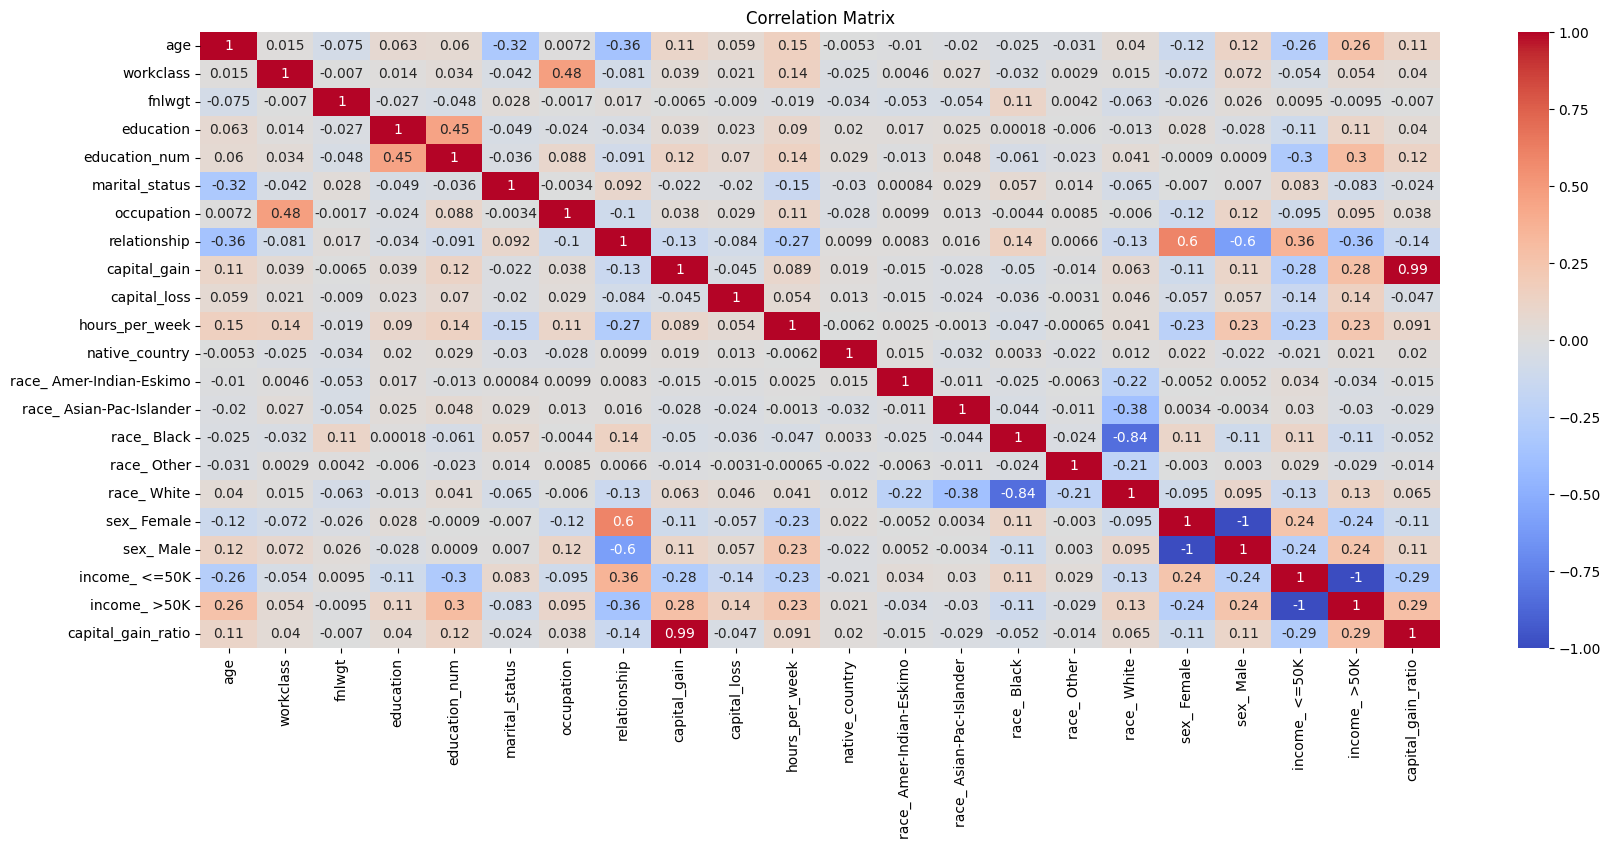

In [47]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()


In [48]:
corr_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_gain_ratio
age,1.000000,0.014987,-0.074674,0.062788,0.059701,-0.316484,0.007226,-0.362228,0.107900,0.058806,...,-0.009966,-0.019847,-0.025319,-0.030753,0.040245,-0.118952,0.118952,-0.263714,0.263714,0.111245
workclass,0.014987,1.000000,-0.007024,0.014323,0.034363,-0.042393,0.476551,-0.080980,0.039274,0.021289,...,0.004635,0.027128,-0.032127,0.002895,0.014622,-0.072008,0.072008,-0.054404,0.054404,0.039851
fnlwgt,-0.074674,-0.007024,1.000000,-0.027271,-0.048035,0.027893,-0.001672,0.016774,-0.006503,-0.009014,...,-0.052678,-0.053769,0.112310,0.004207,-0.062903,-0.026449,0.026449,0.009484,-0.009484,-0.006978
education,0.062788,0.014323,-0.027271,1.000000,0.448197,-0.048958,-0.024015,-0.034095,0.038565,0.022987,...,0.016641,0.024705,0.000177,-0.006043,-0.013388,0.027510,-0.027510,-0.106738,0.106738,0.039554
education_num,0.059701,0.034363,-0.048035,0.448197,1.000000,-0.036178,0.087827,-0.090789,0.119410,0.069814,...,-0.012826,0.047561,-0.060688,-0.023131,0.041291,-0.000900,0.000900,-0.304167,0.304167,0.121144
marital_status,-0.316484,-0.042393,0.027893,-0.048958,-0.036178,1.000000,-0.003365,0.091805,-0.022435,-0.019820,...,0.000835,0.028848,0.056892,0.013591,-0.065288,-0.006968,0.006968,0.083282,-0.083282,-0.023850
occupation,0.007226,0.476551,-0.001672,-0.024015,0.087827,-0.003365,1.000000,-0.102249,0.037596,0.029393,...,0.009869,0.012545,-0.004388,0.008526,-0.005979,-0.115452,0.115452,-0.095267,0.095267,0.037839
relationship,-0.362228,-0.080980,0.016774,-0.034095,-0.090789,0.091805,-0.102249,1.000000,-0.133597,-0.083987,...,0.008330,0.015620,0.139357,0.006571,-0.131754,0.597132,-0.597132,0.356536,-0.356536,-0.138002
capital_gain,0.107900,0.039274,-0.006503,0.038565,0.119410,-0.022435,0.037596,-0.133597,1.000000,-0.044730,...,-0.014970,-0.027926,-0.050092,-0.013941,0.062565,-0.105667,0.105667,-0.278664,0.278664,0.994533
capital_loss,0.058806,0.021289,-0.009014,0.022987,0.069814,-0.019820,0.029393,-0.083987,-0.044730,1.000000,...,-0.014958,-0.024418,-0.035732,-0.003111,0.045998,-0.056850,0.056850,-0.142989,0.142989,-0.046770


Here’s what I infer from this correlation matrix:  

### **Key Insights on Relationships**
1. **Income Correlation (`income_ >50K`)**  
   - **Strongest Positive Correlations**:  
     - `education_num` (**0.30**): Higher education level is positively associated with earning more.  
     - `capital_gain` (**0.28**): People with higher capital gains tend to earn above 50K.  
     - `age` (**0.26**): Older individuals have a higher likelihood of earning more, possibly due to experience.  
   - **Strongest Negative Correlations**:  
     - `relationship` (**-0.36**): Individuals in certain relationships (like being a spouse) are less likely to earn above 50K.  
     - `sex_ Female` (**-0.24**): Females are less likely to earn above 50K compared to males.  
     - `income_ <=50K` (**-1.00**): Perfect negative correlation with `income_ >50K`, as expected.  

2. **Feature Redundancy & Potential Issues**  
   - `capital_gain` and `capital_gain_ratio` (**0.99**): These features are nearly identical; I should consider keeping only one.  
   - `sex_ Female` and `sex_ Male` (**-1.00**): One can be removed since they are perfect opposites.  
   - `education` and `education_num` (**0.45**): Not a perfect correlation but still quite high; I should evaluate their individual impact.  

3. **Interesting Observations**  
   - **Workclass & Occupation Relationship** (**0.47**): These two are moderately correlated, suggesting workclass could influence occupation.  
   - **Race Correlation with Income**:  
     - `race_ White` (0.12) has a slightly higher positive correlation with `income_ >50K` than other racial categories.  
     - `race_ Black` (-0.11) has a slight negative correlation with earning above 50K.  
   - **Marital Status & Relationship**:  
     - `marital_status` and `relationship` have a moderate correlation (**0.09**), which makes sense since being married influences relationship status.  
